# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.neighbors

In [2]:
# for downloading
import urllib.request

# file handling
import zipfile
import os

# Download the dataset

In [3]:
#download
url = 'http://files.grouplens.org/datasets/hetrec2011/hetrec2011-lastfm-2k.zip'

urllib.request.urlretrieve(url, './hetrec2011-lastfm-2k.zip')

('./hetrec2011-lastfm-2k.zip', <http.client.HTTPMessage at 0x7fd87e9b9d50>)

In [4]:
with zipfile.ZipFile('./hetrec2011-lastfm-2k.zip', 'r') as zip_ref:
    zip_ref.extractall('./lastfm')

# Explore the dataset

In [5]:
dfArtists = pd.read_table('./lastfm/artists.dat')
dfArtists.tail(10)

id              name                                           url  \
17622  18736         LOSTFREEQ            http://www.last.fm/music/LOSTFREEQ   
17623  18737     Ciccone Youth        http://www.last.fm/music/Ciccone+Youth   
17624  18738          Cubanate             http://www.last.fm/music/Cubanate   
17625  18739        Apollo 440           http://www.last.fm/music/Apollo+440   
17626  18740        Die Krupps           http://www.last.fm/music/Die+Krupps   
17627  18741    Diamanda Galás  http://www.last.fm/music/Diamanda+Gal%C3%A1s   
17628  18742            Aya RL               http://www.last.fm/music/Aya+RL   
17629  18743       Coptic Rain          http://www.last.fm/music/Coptic+Rain   
17630  18744      Oz Alchemist         http://www.last.fm/music/Oz+Alchemist   
17631  18745  Grzegorz Tomczak     http://www.last.fm/music/Grzegorz+Tomczak   

                                              pictureURL  
17622  http://userserve-ak.last.fm/serve/252/24226431...  
17623  http://userserve-ak.last.fm/serve/252/56318105...  
17624  http://userserve-ak.last.fm/serve/252/57473381...  
17625  http://userserve-ak.last.fm/serve/252/6561781.jpg  
17626   http://userserve-ak.last.fm/serve/252/110294.jpg  
17627  http://userserve-ak.last.fm/serve/252/16352971...  
17628   http://userserve-ak.last.fm/serve/252/207445.jpg  
17629   http://userserve-ak.last.fm/serve/252/344868.jpg  
17630  http://userserve-ak.last.fm/serve/252/29297695...  
17631  http://userserve-ak.last.fm/serve/252/59486303...

In [30]:
dfArtists.head(10)

artistID               name                                         url  \
0         1       MALICE MIZER       http://www.last.fm/music/MALICE+MIZER   
1         2    Diary of Dreams    http://www.last.fm/music/Diary+of+Dreams   
2         3  Carpathian Forest  http://www.last.fm/music/Carpathian+Forest   
3         4       Moi dix Mois       http://www.last.fm/music/Moi+dix+Mois   
4         5        Bella Morte        http://www.last.fm/music/Bella+Morte   
5         6          Moonspell          http://www.last.fm/music/Moonspell   
6         7     Marilyn Manson     http://www.last.fm/music/Marilyn+Manson   
7         8        DIR EN GREY        http://www.last.fm/music/DIR+EN+GREY   
8         9        Combichrist        http://www.last.fm/music/Combichrist   
9        10            Grendel            http://www.last.fm/music/Grendel   

                                          pictureURL  
0    http://userserve-ak.last.fm/serve/252/10808.jpg  
1  http://userserve-ak.last.fm/serve/252/3052066.jpg  
2  http://userserve-ak.last.fm/serve/252/40222717...  
3  http://userserve-ak.last.fm/serve/252/54697835...  
4  http://userserve-ak.last.fm/serve/252/14789013...  
5  http://userserve-ak.last.fm/serve/252/2181591.jpg  
6  http://userserve-ak.last.fm/serve/252/2558217.jpg  
7  http://userserve-ak.last.fm/serve/252/46968835...  
8  http://userserve-ak.last.fm/serve/252/51273485...  
9  http://userserve-ak.last.fm/serve/252/5872875.jpg

In [7]:
dfUsers = pd.read_table('./lastfm/user_artists.dat')
dfUsers.head(10)

userID  artistID  weight
0       2        51   13883
1       2        52   11690
2       2        53   11351
3       2        54   10300
4       2        55    8983
5       2        56    6152
6       2        57    5955
7       2        58    4616
8       2        59    4337
9       2        60    4147

In [8]:
dfUsers = dfUsers.rename({'weight': 'playcount'}, axis=1)
dfArtists = dfArtists.rename({'id': 'artistID'}, axis=1)

In [9]:
len(dfUsers)

92834

In [10]:
dfUsers['playcount'].min()

1

<Axes: >

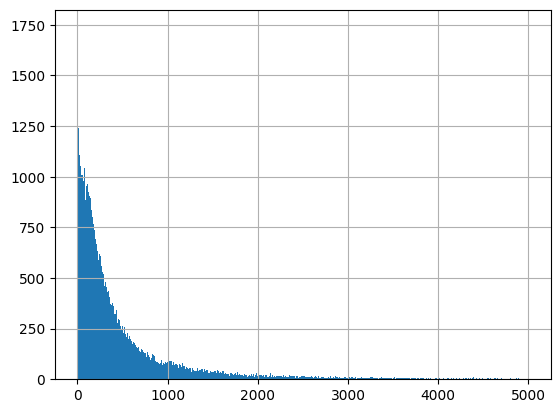

In [11]:
dfUsers.playcount.hist(bins=1000, range=(0,5000))

# Merge Tables to check correlations

In [12]:
dfUser_Artists = dfUsers.merge(dfArtists, on='artistID')
dfUser_Artists.head()

userID  artistID  playcount         name  \
0       2        51      13883  Duran Duran   
1       4        51        228  Duran Duran   
2      27        51         85  Duran Duran   
3      28        51         10  Duran Duran   
4      62        51        528  Duran Duran   

                                    url  \
0  http://www.last.fm/music/Duran+Duran   
1  http://www.last.fm/music/Duran+Duran   
2  http://www.last.fm/music/Duran+Duran   
3  http://www.last.fm/music/Duran+Duran   
4  http://www.last.fm/music/Duran+Duran   

                                         pictureURL  
0  http://userserve-ak.last.fm/serve/252/155668.jpg  
1  http://userserve-ak.last.fm/serve/252/155668.jpg  
2  http://userserve-ak.last.fm/serve/252/155668.jpg  
3  http://userserve-ak.last.fm/serve/252/155668.jpg  
4  http://userserve-ak.last.fm/serve/252/155668.jpg

In [13]:
dfUser_Artists.groupby('name')['playcount'].count().reset_index().rename(columns={'playcount':'usercount'}).sort_values('usercount', ascending=False).head(10)

name  usercount
8352            Lady Gaga        611
2336       Britney Spears        522
12072             Rihanna        484
14109         The Beatles        480
7913           Katy Perry        473
9130              Madonna        429
1411        Avril Lavigne        417
3023   Christina Aguilera        407
10158                Muse        400
11069            Paramore        399

In [14]:
dfUser_Artists[dfUser_Artists['name'] == 'Lady Gaga']

userID  artistID  playcount       name  \
2750       2        89       1519  Lady Gaga   
2751       7        89       5846  Lady Gaga   
2752       8        89        921  Lady Gaga   
2753      11        89       3384  Lady Gaga   
2754      13        89       3967  Lady Gaga   
...      ...       ...        ...        ...   
3356    2077        89        195  Lady Gaga   
3357    2079        89        474  Lady Gaga   
3358    2087        89       1042  Lady Gaga   
3359    2088        89         12  Lady Gaga   
3360    2094        89        951  Lady Gaga   

                                     url  \
2750  http://www.last.fm/music/Lady+Gaga   
2751  http://www.last.fm/music/Lady+Gaga   
2752  http://www.last.fm/music/Lady+Gaga   
2753  http://www.last.fm/music/Lady+Gaga   
2754  http://www.last.fm/music/Lady+Gaga   
...                                  ...   
3356  http://www.last.fm/music/Lady+Gaga   
3357  http://www.last.fm/music/Lady+Gaga   
3358  http://www.last.fm/music/Lady+Gaga   
3359  http://www.last.fm/music/Lady+Gaga   
3360  http://www.last.fm/music/Lady+Gaga   

                                             pictureURL  
2750  http://userserve-ak.last.fm/serve/252/47390093...  
2751  http://userserve-ak.last.fm/serve/252/47390093...  
2752  http://userserve-ak.last.fm/serve/252/47390093...  
2753  http://userserve-ak.last.fm/serve/252/47390093...  
2754  http://userserve-ak.last.fm/serve/252/47390093...  
...                                                 ...  
3356  http://userserve-ak.last.fm/serve/252/47390093...  
3357  http://userserve-ak.last.fm/serve/252/47390093...  
3358  http://userserve-ak.last.fm/serve/252/47390093...  
3359  http://userserve-ak.last.fm/serve/252/47390093...  
3360  http://userserve-ak.last.fm/serve/252/47390093...  

[611 rows x 6 columns]

# Build Pivot Table

In [15]:
dfPivot = dfUser_Artists.pivot_table(columns='userID', index='name', values='playcount')
dfPivot = dfPivot.fillna(0)
dfPivot.T

name    !!!  !DISTAIN  !deladap  #####  #2 Orchestra  $lick  \
userID                                                        
2       0.0       0.0       0.0    0.0           0.0    0.0   
3       0.0       0.0       0.0    0.0           0.0    0.0   
4       0.0       0.0       0.0    0.0           0.0    0.0   
5       0.0       0.0       0.0    0.0           0.0    0.0   
6       0.0       0.0       0.0    0.0           0.0    0.0   
...     ...       ...       ...    ...           ...    ...   
2095    0.0       0.0       0.0    0.0           0.0    0.0   
2096    0.0       0.0       0.0    0.0           0.0    0.0   
2097    0.0       0.0       0.0    0.0           0.0    0.0   
2099    0.0       0.0       0.0    0.0           0.0    0.0   
2100    0.0       0.0       0.0    0.0           0.0    0.0   

name    $lick feat. Six-Fo  (1962-1966)  (Pre) Kingdom  (We Are) Performance  \
userID                                                                         
2                      0.0          0.0            0.0                   0.0   
3                      0.0          0.0            0.0                   0.0   
4                      0.0          0.0            0.0                   0.0   
5                      0.0          0.0            0.0                   0.0   
6                      0.0          0.0            0.0                   0.0   
...                    ...          ...            ...                   ...   
2095                   0.0          0.0            0.0                   0.0   
2096                   0.0          0.0            0.0                   0.0   
2097                   0.0          0.0            0.0                   0.0   
2099                   0.0          0.0            0.0                   0.0   
2100                   0.0          0.0            0.0                   0.0   

name    ...  티아라   현아  ＬｕＬｕ  ＭＡＮＮＥＱＵＩＮ  ＰＥＲＥＳＴＲＯＩＫＡ  ＲＥＤ  ＶａｎｅｓｓＡ  ｂｏｏｇｉｅｍａｎ  \
userID  ...                                                                    
2       ...  0.0  0.0   0.0        0.0          0.0  0.0      0.0        0.0   
3       ...  0.0  0.0   0.0        0.0          0.0  0.0      0.0        0.0   
4       ...  0.0  0.0   0.0        0.0          0.0  0.0      0.0        0.0   
5       ...  0.0  0.0   0.0        0.0          0.0  0.0      0.0        0.0   
6       ...  0.0  0.0   0.0        0.0          0.0  0.0      0.0        0.0   
...     ...  ...  ...   ...        ...          ...  ...      ...        ...   
2095    ...  0.0  0.0   0.0        0.0          0.0  0.0      0.0        0.0   
2096    ...  0.0  0.0   0.0        0.0          0.0  0.0      0.0        0.0   
2097    ...  0.0  0.0   0.0        0.0          0.0  0.0      0.0        0.0   
2099    ...  0.0  0.0   0.0        0.0          0.0  0.0      0.0        0.0   
2100    ...  0.0  0.0   0.0        0.0          0.0  0.0      0.0        0.0   

name    ｂｏｒｎ  ｍａｃｈｉｎｅ  
userID                 
2        0.0      0.0  
3        0.0      0.0  
4        0.0      0.0  
5        0.0      0.0  
6        0.0      0.0  
...      ...      ...  
2095     0.0      0.0  
2096     0.0      0.0  
2097     0.0      0.0  
2099     0.0      0.0  
2100     0.0      0.0  

[1892 rows x 17632 columns]

In [16]:
userId_test = 2
len(dfPivot[userId_test][dfPivot[userId_test] != 0.0]) / len(dfPivot) * 100

0.2835753176043557

# Show correlating artists

In [17]:
selected_artist = dfPivot.loc["The Beatles"]

correlation = dfPivot.T.corrwith(selected_artist)
correlation = correlation.sort_values(ascending=False)
correlation.head(10)

name
The Beatles               1.000000
John Lennon               0.697387
Paul McCartney            0.429886
George Harrison           0.419502
Imaad Wasif               0.401899
Paul McCartney & Wings    0.387604
The White Stripes         0.366257
The Runaways              0.361107
Brendan Benson            0.356526
Self Against City         0.336001
dtype: float64

In [31]:
selected_artist = dfPivot.loc["Tom Felton"]

correlation = dfPivot.T.corrwith(selected_artist)
correlation = correlation.sort_values(ascending=False)
correlation.head(10)

name
Tom Felton          1.000000
Lady Gaga           0.682988
Gwen Stefani        0.091791
Adam Lambert        0.089437
Drake Bell          0.044324
Jessie J            0.034944
nevershoutnever!    0.029028
Cyndi Lauper        0.025937
Ke$ha               0.025630
Ashlee Simpson      0.014214
dtype: float64

# Using Nearest Neighbors

In [33]:
model = sklearn.neighbors.NearestNeighbors(n_neighbors=7, algorithm='brute', metric='cosine')

In [34]:
model.fit(dfPivot)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=7)

In [36]:
artist_test = 'The Beatles'

distances, suggestions = model.kneighbors([dfPivot.loc[artist_test]])

list(zip(dfPivot.iloc[suggestions[0]].index.tolist(), np.round(distances[0], 4)))

[('The Beatles', 0.0),
 ('John Lennon', 0.3),
 ('Paul McCartney', 0.5632),
 ('George Harrison', 0.5766),
 ('Imaad Wasif', 0.6019),
 ('Paul McCartney & Wings', 0.6108),
 ('The White Stripes', 0.615)]

In [35]:
artist_test = 'Lady Gaga'

distances, suggestions = model.kneighbors([dfPivot.loc[artist_test]])

list(zip(dfPivot.iloc[suggestions[0]].index.tolist(), np.round(distances[0], ))



[('Lady Gaga', 0.0),
 ('Tom Felton', 0.3237),
 ('B is for Bloodbath', 0.5552),
 ('This Romantic Tragedy', 0.5552),
 ('Massacre On The Dancefloor', 0.5552),
 ('White Lilium', 0.5552),
 ('Fagasaurus Sex', 0.5552)]

In [22]:
dfSuggestedNeighbors = dfPivot.iloc[suggestions[0]]
dfSuggestedNeighbors.loc[:, (dfSuggestedNeighbors != 0).any(axis=0)]
dfSuggestedNeighbors

userID                  2     3     4      5     6     7     8     9     10    \
name                                                                            
The Beatles              0.0   0.0   0.0  138.0   0.0   0.0   0.0   0.0   0.0   
John Lennon              0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   
Paul McCartney           0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   
George Harrison          0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   
Imaad Wasif              0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   
Paul McCartney & Wings   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   
The White Stripes        0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   

userID                  11    ...  2090  2091   2092  2093  2094  2095  2096  \
name                          ...                                              
The Beatles              0.0  ...   0.0   0.0  344.0   0.0   0.0   0.0   0.0   
John Lennon              0.0  ...   0.0   0.0    0.0  90.0   0.0   0.0   0.0   
Paul McCartney           0.0  ...   0.0   0.0    0.0   0.0   0.0   0.0   0.0   
George Harrison          0.0  ...   0.0   0.0    0.0   0.0   0.0   0.0   0.0   
Imaad Wasif              0.0  ...   0.0   0.0    0.0   0.0   0.0   0.0   0.0   
Paul McCartney & Wings   0.0  ...   0.0   0.0    0.0   0.0   0.0   0.0   0.0   
The White Stripes        0.0  ...   0.0   0.0  183.0   0.0   0.0   0.0   0.0   

userID                   2097  2099  2100  
name                                       
The Beatles               0.0   0.0   0.0  
John Lennon               0.0   0.0   0.0  
Paul McCartney            0.0   0.0   0.0  
George Harrison           0.0   0.0   0.0  
Imaad Wasif               0.0   0.0   0.0  
Paul McCartney & Wings    0.0   0.0   0.0  
The White Stripes       601.0   0.0   0.0  

[7 rows x 1892 columns]

# Find similar users

In [37]:
model.fit(dfPivot.T)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=7)

In [24]:
userId_test = 10
dfPivot[userId_test]

name
!!!             0.0
!DISTAIN        0.0
!deladap        0.0
#####           0.0
#2 Orchestra    0.0
               ... 
ＲＥＤ             0.0
ＶａｎｅｓｓＡ         0.0
ｂｏｏｇｉｅｍａｎ       0.0
ｂｏｒｎ            0.0
ｍａｃｈｉｎｅ         0.0
Name: 10, Length: 17632, dtype: float64

In [25]:
dfPivot[dfPivot[userId_test] != 0.0]

userID                     2     3      4      5     6     7     8     9     \
name                                                                          
Animal Collective           0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
Arcade Fire                 0.0   0.0    0.0  374.0   0.0   0.0   0.0   0.0   
Art Brut                    0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
Babyshambles                0.0   0.0    0.0  255.0   0.0   0.0   0.0   0.0   
Bat for Lashes              0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
Beirut                      0.0   0.0    0.0  620.0   0.0   0.0   0.0   0.0   
Black Lips                  0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
Bon Iver                    0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
Broken Social Scene         0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
Cordel do Fogo Encantado    0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
Death Cab for Cutie         0.0   0.0    0.0  185.0   0.0   0.0   0.0   0.0   
Gogol Bordello              0.0   0.0    0.0  337.0   0.0   0.0   0.0   0.0   
Interpol                    0.0   0.0    0.0  142.0   0.0   0.0   0.0   0.0   
Joy Division                0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
Jónsi                       0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
Kate Nash                   0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
Kings of Leon               0.0   0.0    0.0  138.0   0.0   0.0   0.0   0.0   
Klaxons                     0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
Local Natives               0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
Los Hermanos                0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
M. Ward                     0.0   0.0    0.0  178.0   0.0   0.0   0.0   0.0   
Manu Chao                   0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
Mombojó                     0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
Mundo Livre S/A             0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
Móveis Coloniais de Acaju   0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
O Teatro Mágico             0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
Poney Express               0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
Ra Ra Riot                  0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
Radiohead                   0.0   0.0  826.0  884.0   0.0   0.0   0.0   0.0   
Rilo Kiley                  0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
She & Him                   0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
She Wants Revenge           0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
Sigur Rós                   0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
Silverchair                 0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
Spoon                       0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
The Cribs                   0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
The Cure                    0.0   0.0  724.0    0.0   0.0   0.0   0.0   0.0   
The Killers                 0.0   0.0    0.0  138.0   0.0   0.0   0.0   0.0   
The Kills                   0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
The Libertines              0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
The National                0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
The Rakes                   0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
The Smashing Pumpkins       0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
The Smiths                  0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
The Strokes                 0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
The Tallest Man on Earth    0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
Tokyo Police Club           0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
Wolf Parade                 0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   
Yeah Yeah Yeahs             0.0   0.0    0.0    0.

In [38]:
distances, suggestions = model.kneighbors([dfPivot[userId_test]])

distances, suggestions

/opt/jupyterhub/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


(array([[1.11022302e-16, 5.85322565e-01, 6.09366218e-01, 6.42578860e-01,
         6.50779211e-01, 6.65477520e-01, 6.75141870e-01]]),
 array([[   8,   31, 1833,  712, 1574, 1226, 1477]]))

In [39]:
dfSuggestedNeighbors = dfPivot.T.iloc[suggestions[0]]
dfSuggestedNeighbors.loc[:, (dfSuggestedNeighbors != 0).any(axis=0)]
dfSuggestedNeighbors

name    !!!  !DISTAIN  !deladap  #####  #2 Orchestra  $lick  \
userID                                                        
10      0.0       0.0       0.0    0.0           0.0    0.0   
34      0.0       0.0       0.0    0.0           0.0    0.0   
2034    0.0       0.0       0.0    0.0           0.0    0.0   
764     0.0       0.0       0.0    0.0           0.0    0.0   
1746    0.0       0.0       0.0    0.0           0.0    0.0   
1354    0.0       0.0       0.0    0.0           0.0    0.0   
1637    0.0       0.0       0.0    0.0           0.0    0.0   

name    $lick feat. Six-Fo  (1962-1966)  (Pre) Kingdom  (We Are) Performance  \
userID                                                                         
10                     0.0          0.0            0.0                   0.0   
34                     0.0          0.0            0.0                   0.0   
2034                   0.0          0.0            0.0                   0.0   
764                    0.0          0.0            0.0                   0.0   
1746                   0.0          0.0            0.0                   0.0   
1354                   0.0          0.0            0.0                   0.0   
1637                   0.0          0.0            0.0                   0.0   

name    ...  티아라   현아  ＬｕＬｕ  ＭＡＮＮＥＱＵＩＮ  ＰＥＲＥＳＴＲＯＩＫＡ  ＲＥＤ  ＶａｎｅｓｓＡ  ｂｏｏｇｉｅｍａｎ  \
userID  ...                                                                    
10      ...  0.0  0.0   0.0        0.0          0.0  0.0      0.0        0.0   
34      ...  0.0  0.0   0.0        0.0          0.0  0.0      0.0        0.0   
2034    ...  0.0  0.0   0.0        0.0          0.0  0.0      0.0        0.0   
764     ...  0.0  0.0   0.0        0.0          0.0  0.0      0.0        0.0   
1746    ...  0.0  0.0   0.0        0.0          0.0  0.0      0.0        0.0   
1354    ...  0.0  0.0   0.0        0.0          0.0  0.0      0.0        0.0   
1637    ...  0.0  0.0   0.0        0.0          0.0  0.0      0.0        0.0   

name    ｂｏｒｎ  ｍａｃｈｉｎｅ  
userID                 
10       0.0      0.0  
34       0.0      0.0  
2034     0.0      0.0  
764      0.0      0.0  
1746     0.0      0.0  
1354     0.0      0.0  
1637     0.0      0.0  

[7 rows x 17632 columns]

In [28]:
dfNotSeenByUser = dfSuggestedNeighbors.T[0.0 == dfSuggestedNeighbors.T[userId_test]].T

dfNotSeenByUser.mean().sort_values(ascending=False).head(10)

name
Black Rebel Motorcycle Club    765.000000
A Perfect Circle               616.000000
Depeche Mode                   552.571429
The Cardigans                  515.000000
311                            502.285714
Oasis                          438.000000
GACKT                          421.714286
Rachael Yamagata               415.428571
The Stone Roses                352.857143
Phoenix                        344.142857
dtype: float64

In [29]:
(dfNotSeenByUser.mean() * dfNotSeenByUser.replace({0:np.nan}).count()).sort_values(ascending=False).head(10)

name
Oasis                          2190.000000
Depeche Mode                   1657.714286
Black Rebel Motorcycle Club    1530.000000
The Stone Roses                1058.571429
Cat Power                       999.428571
Morrissey                       979.285714
Muse                            859.285714
Phoenix                         688.285714
MGMT                            688.285714
New Order                       654.285714
dtype: float64